My ID - A09190061, last two digits - 61

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression, make_classification, make_sparse_uncorrelated
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Problem1

In [2]:
X, y = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, class_sep = 0.6, flip_y = 0.02, random_state = 61)

# Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 61)

In [3]:
# Let's create the pipeline
scaler = MinMaxScaler()
knn_model = KNeighborsClassifier()
combined_model = make_pipeline(scaler, knn_model)

In [4]:
# Applying hyper-parameter tuning
# Use 10 fold cross-validation
k = np.arange(1, 20, 2)
optimal_combined_model = GridSearchCV(combined_model, param_grid={"kneighborsclassifier__n_neighbors": k}, cv = 10, n_jobs=  -1)
optimal_combined_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [5]:
training_scores = []
testing_scores = []
scores = {}

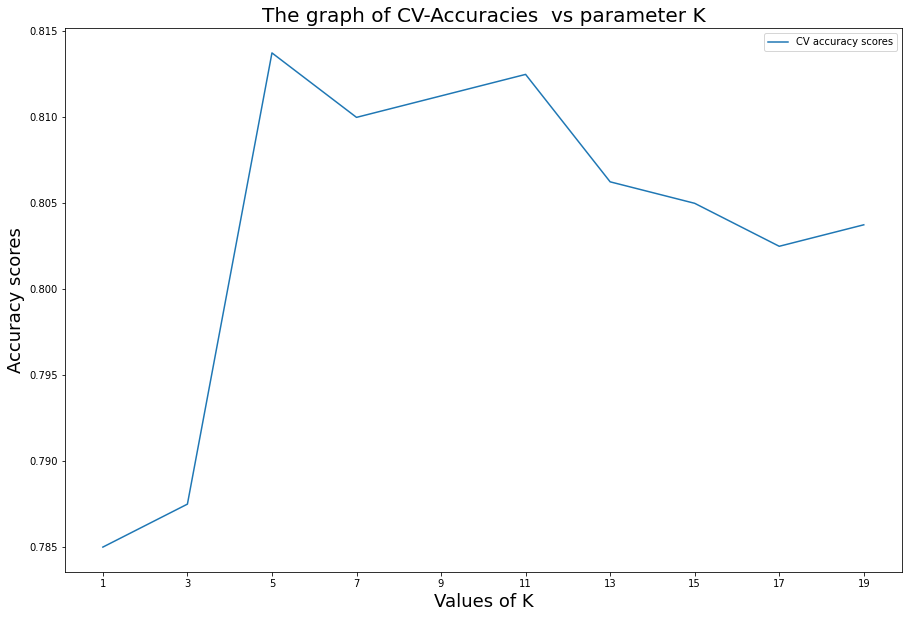

In [6]:
training_scores = []
testing_scores = []
scores = {}
for k in np.arange(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    testing_scores.append(model.score(X_test, y_test))
plt.figure(figsize=(15,10))
plt.plot(np.arange(1, 20, 2), optimal_combined_model.cv_results_["mean_test_score"], label = "CV accuracy scores")
plt.ylabel("Accuracy scores", fontsize = 18)
plt.xlabel("Values of K", fontsize = 18)
plt.title("The graph of CV-Accuracies  vs parameter K", fontsize = 20)
plt.xticks(np.arange(1, 20, 2))
plt.legend()
plt.show()

### As we see in the plot above the highest CV accuracy which is 0.814, is in the case of K = 5. Grid Search CV  searches over a pre-defined hyperparameter space to find the combination of hyperparameters that results in the best model performance. It does this by evaluating all possible combinations of hyperparameters using cross-validation, and selecting the combination with the highest mean cross-validation score. Grid Search CV is a computationally expensive method, but it can help find the best combination of hyperparameters for a given model.

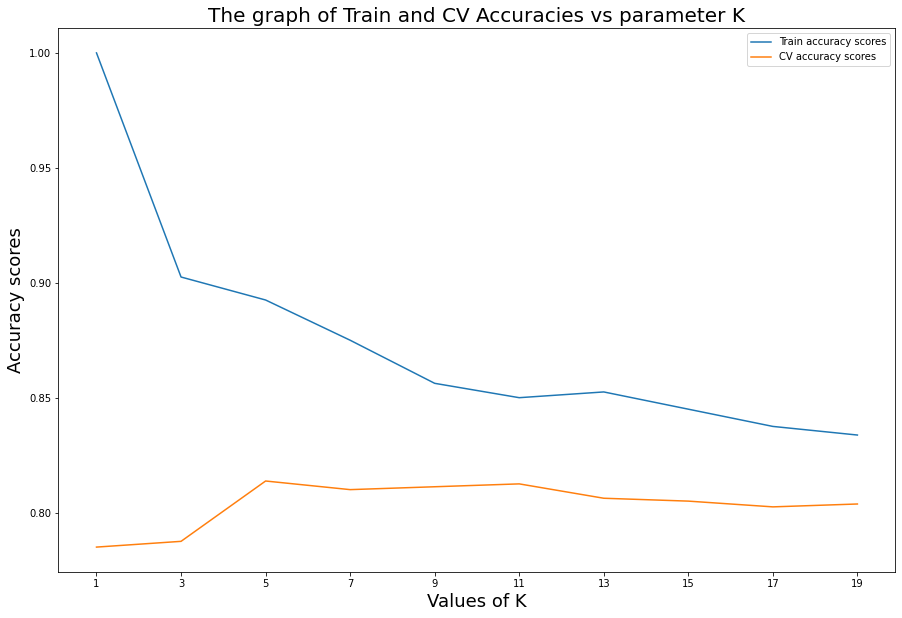

In [30]:
training_scores = []
testing_scores = []
scores = {}
for k in np.arange(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    testing_scores.append(model.score(X_test, y_test))
plt.figure(figsize=(15,10))
plt.plot(np.arange(1, 20, 2), training_scores, label = "Train accuracy scores")
plt.plot(np.arange(1, 20, 2), optimal_combined_model.cv_results_["mean_test_score"], label = "CV accuracy scores")
plt.ylabel("Accuracy scores", fontsize = 18)
plt.title("The graph of Train and CV Accuracies vs parameter K", fontsize = 20)
plt.xlabel("Values of K", fontsize = 18)
plt.xticks(np.arange(1, 20, 2))
plt.legend()
plt.show()

### In the above plot, CV-accuracies and train accuracies are represented by two lines, with train accuracies consistently higher. Train accuracies approach CV accuracies as K values increase, notably when K=5, where the CV-accuracy is approximately 0.815 and train accuracy is close to 0.89. The difference of 0.075 between these scores is within the acceptable threshold for overfitting, validating the choice of K=5 as optimal. Although minor overfitting is indicated by the discrepancy between training and CV scores, it isn't significant. For example, when K is 1 or 2, there’s a notable overfitting issue, as evidenced by low CV scores and near-perfect train scores. However, for larger K values, the scores converge, eliminating concerns of underfitting

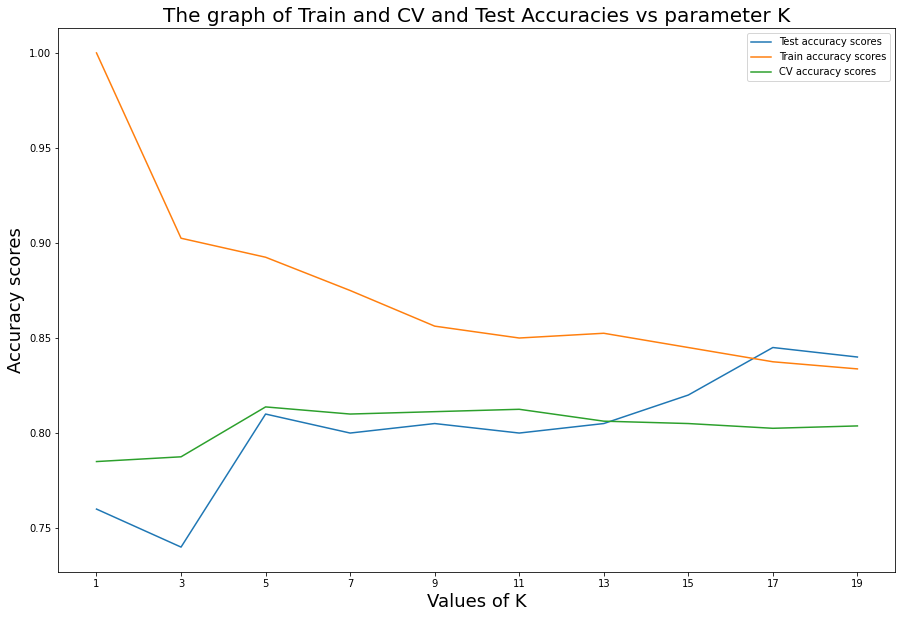

In [31]:
training_scores = []
testing_scores = []
scores = {}
for k in np.arange(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    testing_scores.append(model.score(X_test, y_test))
plt.figure(figsize=(15,10))
plt.plot(np.arange(1, 20, 2), testing_scores[:len(np.arange(1, 20, 2))], label = "Test accuracy scores")
plt.plot(np.arange(1, 20, 2), training_scores, label = "Train accuracy scores")
plt.plot(np.arange(1, 20, 2), optimal_combined_model.cv_results_["mean_test_score"], label = "CV accuracy scores")
plt.ylabel("Accuracy scores", fontsize = 18)
plt.xlabel("Values of K", fontsize = 18)
plt.title("The graph of Train and CV and Test Accuracies vs parameter K", fontsize = 20)
plt.xticks(np.arange(1, 20, 2))
plt.legend()
plt.show()

In [10]:
print(f"The optimal K is {optimal_combined_model.best_params_['kneighborsclassifier__n_neighbors']}")
print(f"Train score: {optimal_combined_model.score(X_train, y_train)}")
print(f"Test score: {optimal_combined_model.score(X_test, y_test)}")

The optimal K is 5
Train score: 0.8925
Test score: 0.8


### In the results above we can see that from the best_params the model choose 5 as the best value for K. The train score when K = 5 is 0.8925 and the test score when K = 5 is 0.8. There is a difference between the training and testing scores (0.8925 - 0.8 = 0.0925: my threshhold of that difference is 0.1 so it is really close to my threshold), indicating a very possibility of overfitting, the difference is not small to be considered insignificant. This means that the model does somehow mimic the training data. This means that overfitting occurs and the model cannot generalize very well and fits closely to the training dataset instead.

# Problem 2. Linear regression and regularization.

In [11]:
# Let's enerate simulated data
X, y = make_regression(n_samples=1000, n_features=10, noise=10, bias=1, random_state=61)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=61)

#### Model preparation for the GridSearch

In [12]:
# feautures scaler
scaler = StandardScaler()

# non-linear feauters without initial paramaters
transformer = PolynomialFeatures()

# lasso model
model = Lasso()

# final pipeline definiton 
combined_model = make_pipeline(transformer, scaler, model)
combined_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

#### The computation power of my laptop is too low, so I used HalvingGridSearchCV instead of regular GridSearchCV.

In [13]:
# array of degrees
degree_grid = np.array([1, 2, 3])

# array of alphas
alpha_grid = np.array([0.001, 0.01, 0.1, 1, 5, 10])

# paramaters grid
param_grid = {
    'polynomialfeatures__degree': degree_grid, 
    'lasso__alpha': alpha_grid
}

# optimal model definition
model_optimal = HalvingGridSearchCV(combined_model, param_grid, n_jobs = -1, cv = 5, verbose = 3)

In [14]:
# prameters searching
model_optimal.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 88
max_resources_: 800
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 88
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 1
n_candidates: 6
n_resources: 264
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 2
n_resources: 792
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                               PolynomialFeatures()),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('lasso', Lasso())]),
                    n_jobs=-1,
                    param_grid={'lasso__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01]),
                                'polynomialfeatures__degree': array([1, 2, 3])},
                    refit=<function _refit_callable at 0x000001E18A9BAA60>,
                    verbose=3)

In [15]:
# model optimal paramters
model_optimal.best_params_

{'lasso__alpha': 0.001, 'polynomialfeatures__degree': 1}

### Above we can see the optimal values of the parameters, thus the degree is 1 and alpha is 0.001 

In [16]:
# The CV-score
model_optimal.score(X_train, y_train)

0.9967340765075866

In [17]:
model_optimal.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001))])

In [18]:
# model evaluations of train and test data
final_estimator = model_optimal.best_estimator_

In [19]:
#Train score
final_estimator.score(X_train, y_train)

0.9967340765075866

In [20]:
#Test-score
final_estimator.score(X_test, y_test)

0.9964737943431665

### Ultimately the performance of the model is good, it neither overfits and neither underfits as the Cv-score, Train-score and Test-score are all very close to each other. Overall the score is nearly 0,996 in all cases which is considered an indicator very good performance.

In [21]:
model_optimal

HalvingGridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                               PolynomialFeatures()),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('lasso', Lasso())]),
                    n_jobs=-1,
                    param_grid={'lasso__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01]),
                                'polynomialfeatures__degree': array([1, 2, 3])},
                    refit=<function _refit_callable at 0x000001E18A9BAA60>,
                    verbose=3)

In [22]:
# mean_test_score array of the model
model_optimal.cv_results_['mean_test_score']

array([0.99599563, 0.9029359 , 0.91853648, 0.99599205, 0.93858799,
       0.9784813 , 0.99595935, 0.98454949, 0.98625179, 0.99524611,
       0.99404409, 0.98970076, 0.98357991, 0.98176475, 0.97164008,
       0.95108409, 0.94520248, 0.92522737, 0.99554768, 0.99577418,
       0.99584358, 0.99641004, 0.99642918, 0.99643067, 0.99663493,
       0.99663498])

#### The features importance based on the Lasso model's coeffienceints.

In [23]:
# features importance 
# first column is a feature id and second column is a its importance
feature_names = [i for i in range(11)]
coef = model_optimal.best_estimator_.named_steps['lasso'].coef_
feature_importance = pd.DataFrame({
    'feature': feature_names, 
    'importance': coef
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

    feature  importance
5         5   93.498161
9         9   84.675378
4         4   82.710511
6         6   61.306363
3         3   41.155822
10       10   38.234863
2         2   31.116317
7         7   28.072588
1         1   19.939457
8         8   10.990225
0         0    0.000000


### I define the importance of the feature like this - If the feature's coefficient is very near to 0(less than 0.05 that's my threshhold)  then it will be considered as insignificant. Hence 9 out of 10 features are important as their coefficients are all greater than zero and only one feature has a coefficient equal to zero hence it is unimportant.